Checkpoint Objective

K-means & Hierarchical Clustering 

This case requires developing a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the data dictionary for credit card dataset :

CUST_ID: Identification of credit cardholder (Categorical)

BALANCE: Balance amount left in their account to make purchases 

(BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)) 

PURCHASES: Amount of purchases made from the account

ONEOFF_PURCHASES: Maximum purchase amount done in once

 INSTALLMENTS_PURCHASES: Amount of purchase done in installments

 CASH_ADVANCE: Cash in advance given by the user

PURCHASES_FREQUENCY: How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

 ONEOFFPURCHASESFREQUENCY: How frequently purchases are happening at once (1 = frequently purchased, 0 = not frequently purchased)

 PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being made (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY: How frequently the cash in advance is being paid 

CASHADVANCETRX: Number of transactions made with "Cash in Advance"

PURCHASES_TRX: Number of purchase transactions made

 CREDIT_LIMIT: Limit of credit card for user 

PAYMENTS: Amount of payment done by user

MINIMUM_PAYMENTS: Minimum amount of payments made by user 

PRCFULLPAYMENT: Percent of full payment paid by user

TENURE: Tenure of credit card service for user

1. Load your dataset. 



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans  

In [2]:
data = pd.read_csv('CC GENERAL.csv')

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.drop('CUST_ID', inplace= True, axis = 1)

In [6]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data.fillna(0, inplace = True)
# it is safe to assume that if the minimum payment is null there was probablay no payments made. 
# This means we can convert all the NULL values in MINIMUM_PAYMENTS to 0.

# same with Credit_limit,the most rational assumption is that there is no credit limit for that particular customer. 
# therefore, we can also set it to 0.

In [8]:
data.isnull().sum().sum()

0

In [10]:
scaler = StandardScaler()
scaling = scaler.fit_transform(data)
scaling.shape
scaled_data = pd.DataFrame(scaling, columns=data.columns)

In [11]:
normalizing = normalize(scaled_data)
normalized_data = pd.DataFrame(normalizing)
normalized_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312186,-0.106381,-0.181215,-0.152229,-0.148878,-0.199079,-0.343960,-0.289442,-0.301662,-0.288029,-0.203039,-0.218078,-0.409521,-0.225604,-0.126799,-0.224142,0.153826
1,0.219903,0.037535,-0.131209,-0.099739,-0.127024,0.728094,-0.341401,-0.189641,-0.256239,0.160385,0.030758,-0.165368,0.192451,0.228756,0.028514,0.065451,0.100786
2,0.126694,0.146797,-0.030507,0.030853,-0.128803,-0.132262,0.359806,0.757513,-0.259827,-0.191358,-0.134893,-0.030890,0.234081,-0.108750,-0.025073,-0.148913,0.102197
3,0.020362,-0.421735,0.096235,0.226507,-0.188515,-0.152882,-0.420562,-0.165599,-0.380282,-0.107372,-0.136659,-0.228736,0.342599,-0.248279,-0.148064,-0.217948,0.149575
4,-0.151696,0.219054,-0.195368,-0.146841,-0.192202,-0.197364,-0.428788,-0.168838,-0.387720,-0.285548,-0.201290,-0.233210,-0.382754,-0.154060,-0.106650,-0.222211,0.152501


In [35]:
pca = PCA()
pca.fit(normalized_data)
#reducing the dimensionality of the data set by transforming a large set of variables into a smaller one
#that still contains most of the information in the large set.

PCA()

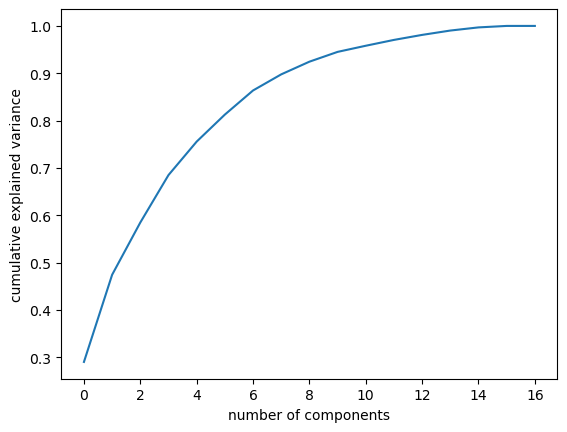

In [14]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29044997, 0.47452947, 0.58490237, 0.68505818, 0.75571567,
       0.8127604 , 0.86368729, 0.89770753, 0.92447857, 0.94517107,
       0.95813186, 0.97045662, 0.9810481 , 0.99022739, 0.99688251,
       0.9999988 , 1.        ])

In [63]:
n_components=2
pca_final = PCA(n_components=n_components)
pca_final.fit(normalized_data)
pca_fit = pca_final.fit_transform(normalized_data)
pca_data = pd.DataFrame(pca_fit)
pca_data.columns = ['P1', 'P2']
pca_data.head()

,P1,P2
0,-0.490758,-0.679041
1,-0.518463,0.545357
2,0.330939,0.269070
3,-0.475762,-0.112022
4,-0.564121,-0.480476


In [58]:
for i in np.arange(n_components):
    index =  np.argmax(np.absolute(pca_final.get_covariance()[i]))
    max_cov = pca_final.get_covariance()[i][index]
    column = data.columns[index]
    print("Principal Component", i+1, "maximum covariance :", "{:.2f}".format(max_cov), "from column", column)
    
#measure the coveriance ie: relationship between two random variables and to what extent, they change together

Principal Component 1 maximum covariance : 0.06 from column BALANCE
Principal Component 2 maximum covariance : 0.04 from column BALANCE_FREQUENCY


2. Use hierarchical clustering to identify the inherent groupings within your data.

In [86]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

3. Plot the clusters. 

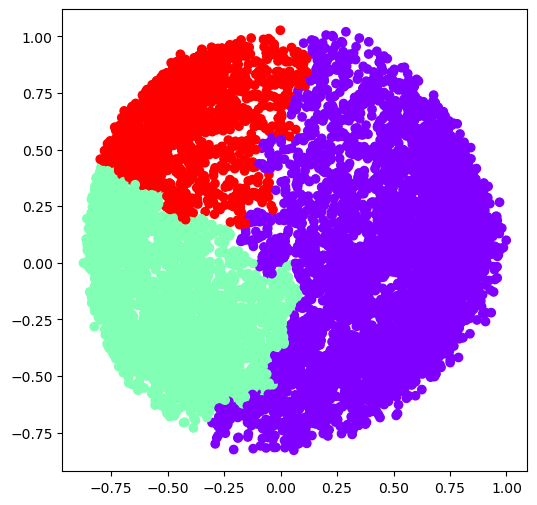

In [87]:
plt.figure(figsize =(6, 6))
plt.scatter(pca_data['P1'], pca_data['P2'],
           c = model.fit_predict(pca_data), cmap ='rainbow')
plt.show()

4. Plot the dendrogram. Use K-means clustering. 

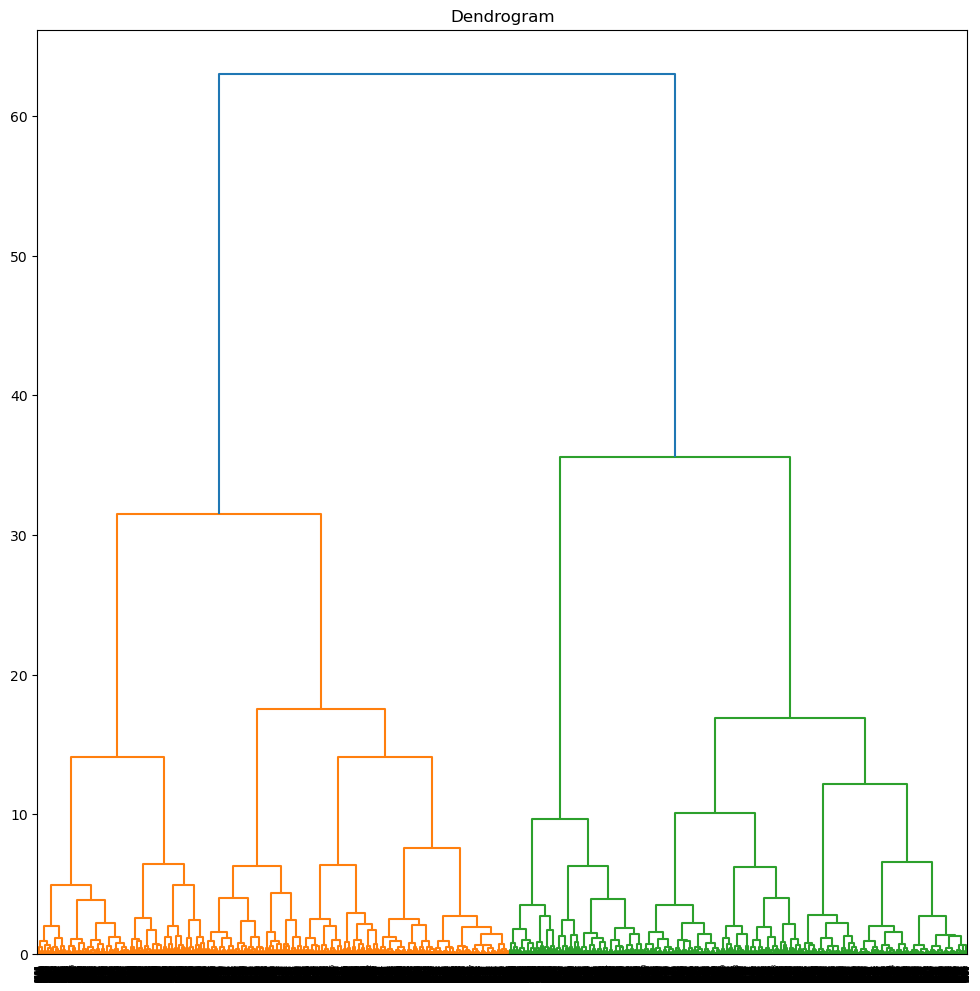

In [64]:
plt.figure(figsize=(12,12))
plt.title("Dendrogram")
dend=shc.dendrogram(shc.linkage(pca_data, method="ward"))

In [67]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(pca_data)

KMeans(n_clusters=3, random_state=0)

In [68]:
kmeans.predict(pca_data)
print(kmeans.cluster_centers_) 

[[ 0.5469784  -0.0294256 ]
 [-0.4193993  -0.31138378]
 [-0.3516623   0.54213882]]


5. Try different K values and select the best one. 

In [76]:
kmeans1=KMeans(n_clusters=6, random_state=0) 
kmeans1.fit(pca_data)
labels1=pd.DataFrame(kmeans.labels_)
kmeans1.predict(pca_data)
print(kmeans1.cluster_centers_)

[[ 0.46248287 -0.31238907]
 [-0.24359068 -0.43023591]
 [-0.66260685 -0.09221052]
 [ 0.23475913  0.55108558]
 [-0.47541192  0.57096006]
 [ 0.70465294  0.19127051]]


6. Plot the clusters. 

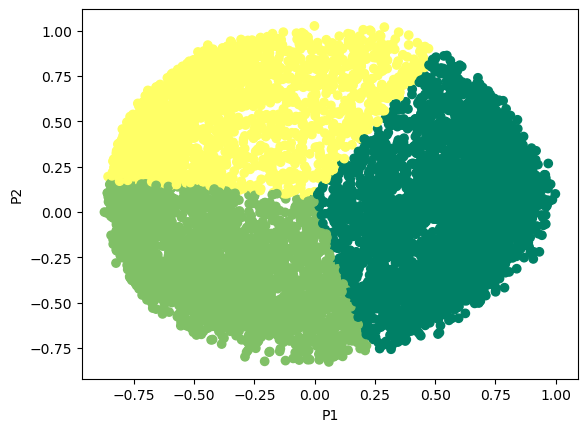

In [77]:
plt.scatter(pca_data['P1'], pca_data['P2'],
            c = KMeans(n_clusters = 3).fit_predict(pca_data),
            cmap = plt.cm.summer)
plt.xlabel("P1")
plt.ylabel("P2")

plt.show() 

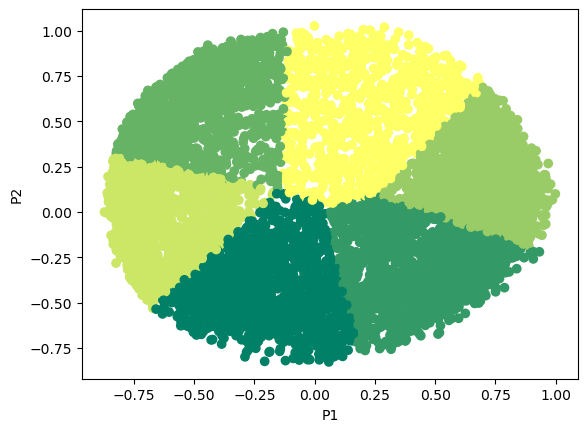

In [79]:
plt.scatter(pca_data['P1'], pca_data['P2'],
            c = KMeans(n_clusters = 6).fit_predict(pca_data),
            cmap = plt.cm.summer)
plt.xlabel("P1")
plt.ylabel("P2")

plt.show() 

7. Compare the two results. 

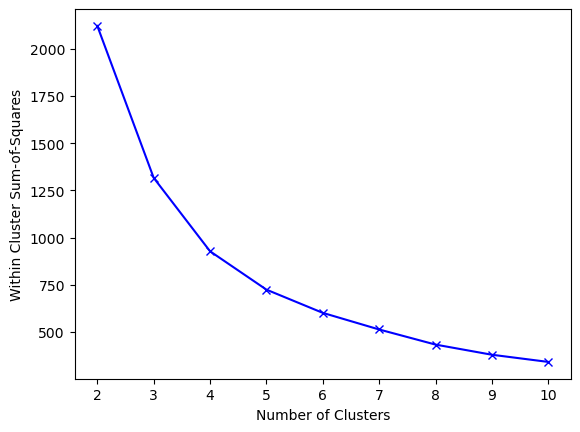

In [85]:
sse = {}
n_clust = np.arange(2,11)

for i in n_clust:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(pca_data)
    sse[i] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum-of-Squares")
plt.show()